# Implementation of Spectrum Sensing using Decision Tree
## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Extracting the training data
### Importing the dataset and seperating it into inputs and target

In [2]:
df_train = pd.read_csv("train_samples_new.csv")
df_train.head()

I/Q signal  Modulation_type  SNR  Amplitude Primary_User_Presence
0   -0.91383-1.3532i               50    0   1.632861                    No
1    0.47213+1.7098i               30   -2   1.773788                    No
2   -0.5656-0.98212i               11   14   1.133342                   Yes
3  0.018993-0.91356i               20   18   0.913757                   Yes
4    0.83479-1.3865i               24   12   1.618412                   Yes

In [3]:
encoder = LabelEncoder()   #LabelEncoder function is used to convert script data to numerical value
df_train['Primary_user_presence_n'] = encoder.fit_transform(df_train['Primary_User_Presence'])

df_train.head()

I/Q signal  Modulation_type  SNR  Amplitude Primary_User_Presence  \
0   -0.91383-1.3532i               50    0   1.632861                    No   
1    0.47213+1.7098i               30   -2   1.773788                    No   
2   -0.5656-0.98212i               11   14   1.133342                   Yes   
3  0.018993-0.91356i               20   18   0.913757                   Yes   
4    0.83479-1.3865i               24   12   1.618412                   Yes   

   Primary_user_presence_n  
0                        0  
1                        0  
2                        1  
3                        1  
4                        1

In [4]:
inputs_train = df_train.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
inputs_train.head()

Modulation_type  SNR  Amplitude
0               50    0   1.632861
1               30   -2   1.773788
2               11   14   1.133342
3               20   18   0.913757
4               24   12   1.618412

In [5]:
target_train = df_train['Primary_user_presence_n'] 
target_train.head()

0    0
1    0
2    1
3    1
4    1
Name: Primary_user_presence_n, dtype: int32

### Feeding the train data into the model

In [6]:
model_DT = tree.DecisionTreeClassifier(criterion='gini',max_depth=15, min_samples_split=10)
model_DT.fit(inputs_train,target_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=10)

In [7]:
model_DT.score(inputs_train,target_train)

0.98561

In [8]:
lst_depth=[]
lst_acc=[]
for i in range (13,23):
    lst_depth.append(i)
    model_DT = tree.DecisionTreeClassifier(criterion='gini',max_depth=i)
    model_DT.fit(inputs_train,target_train)
    lst_acc.append(model_DT.score(inputs_train,target_train)*100)
    print(str(i)+', ', end=' ')

13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  

<function matplotlib.pyplot.show(close=None, block=None)>

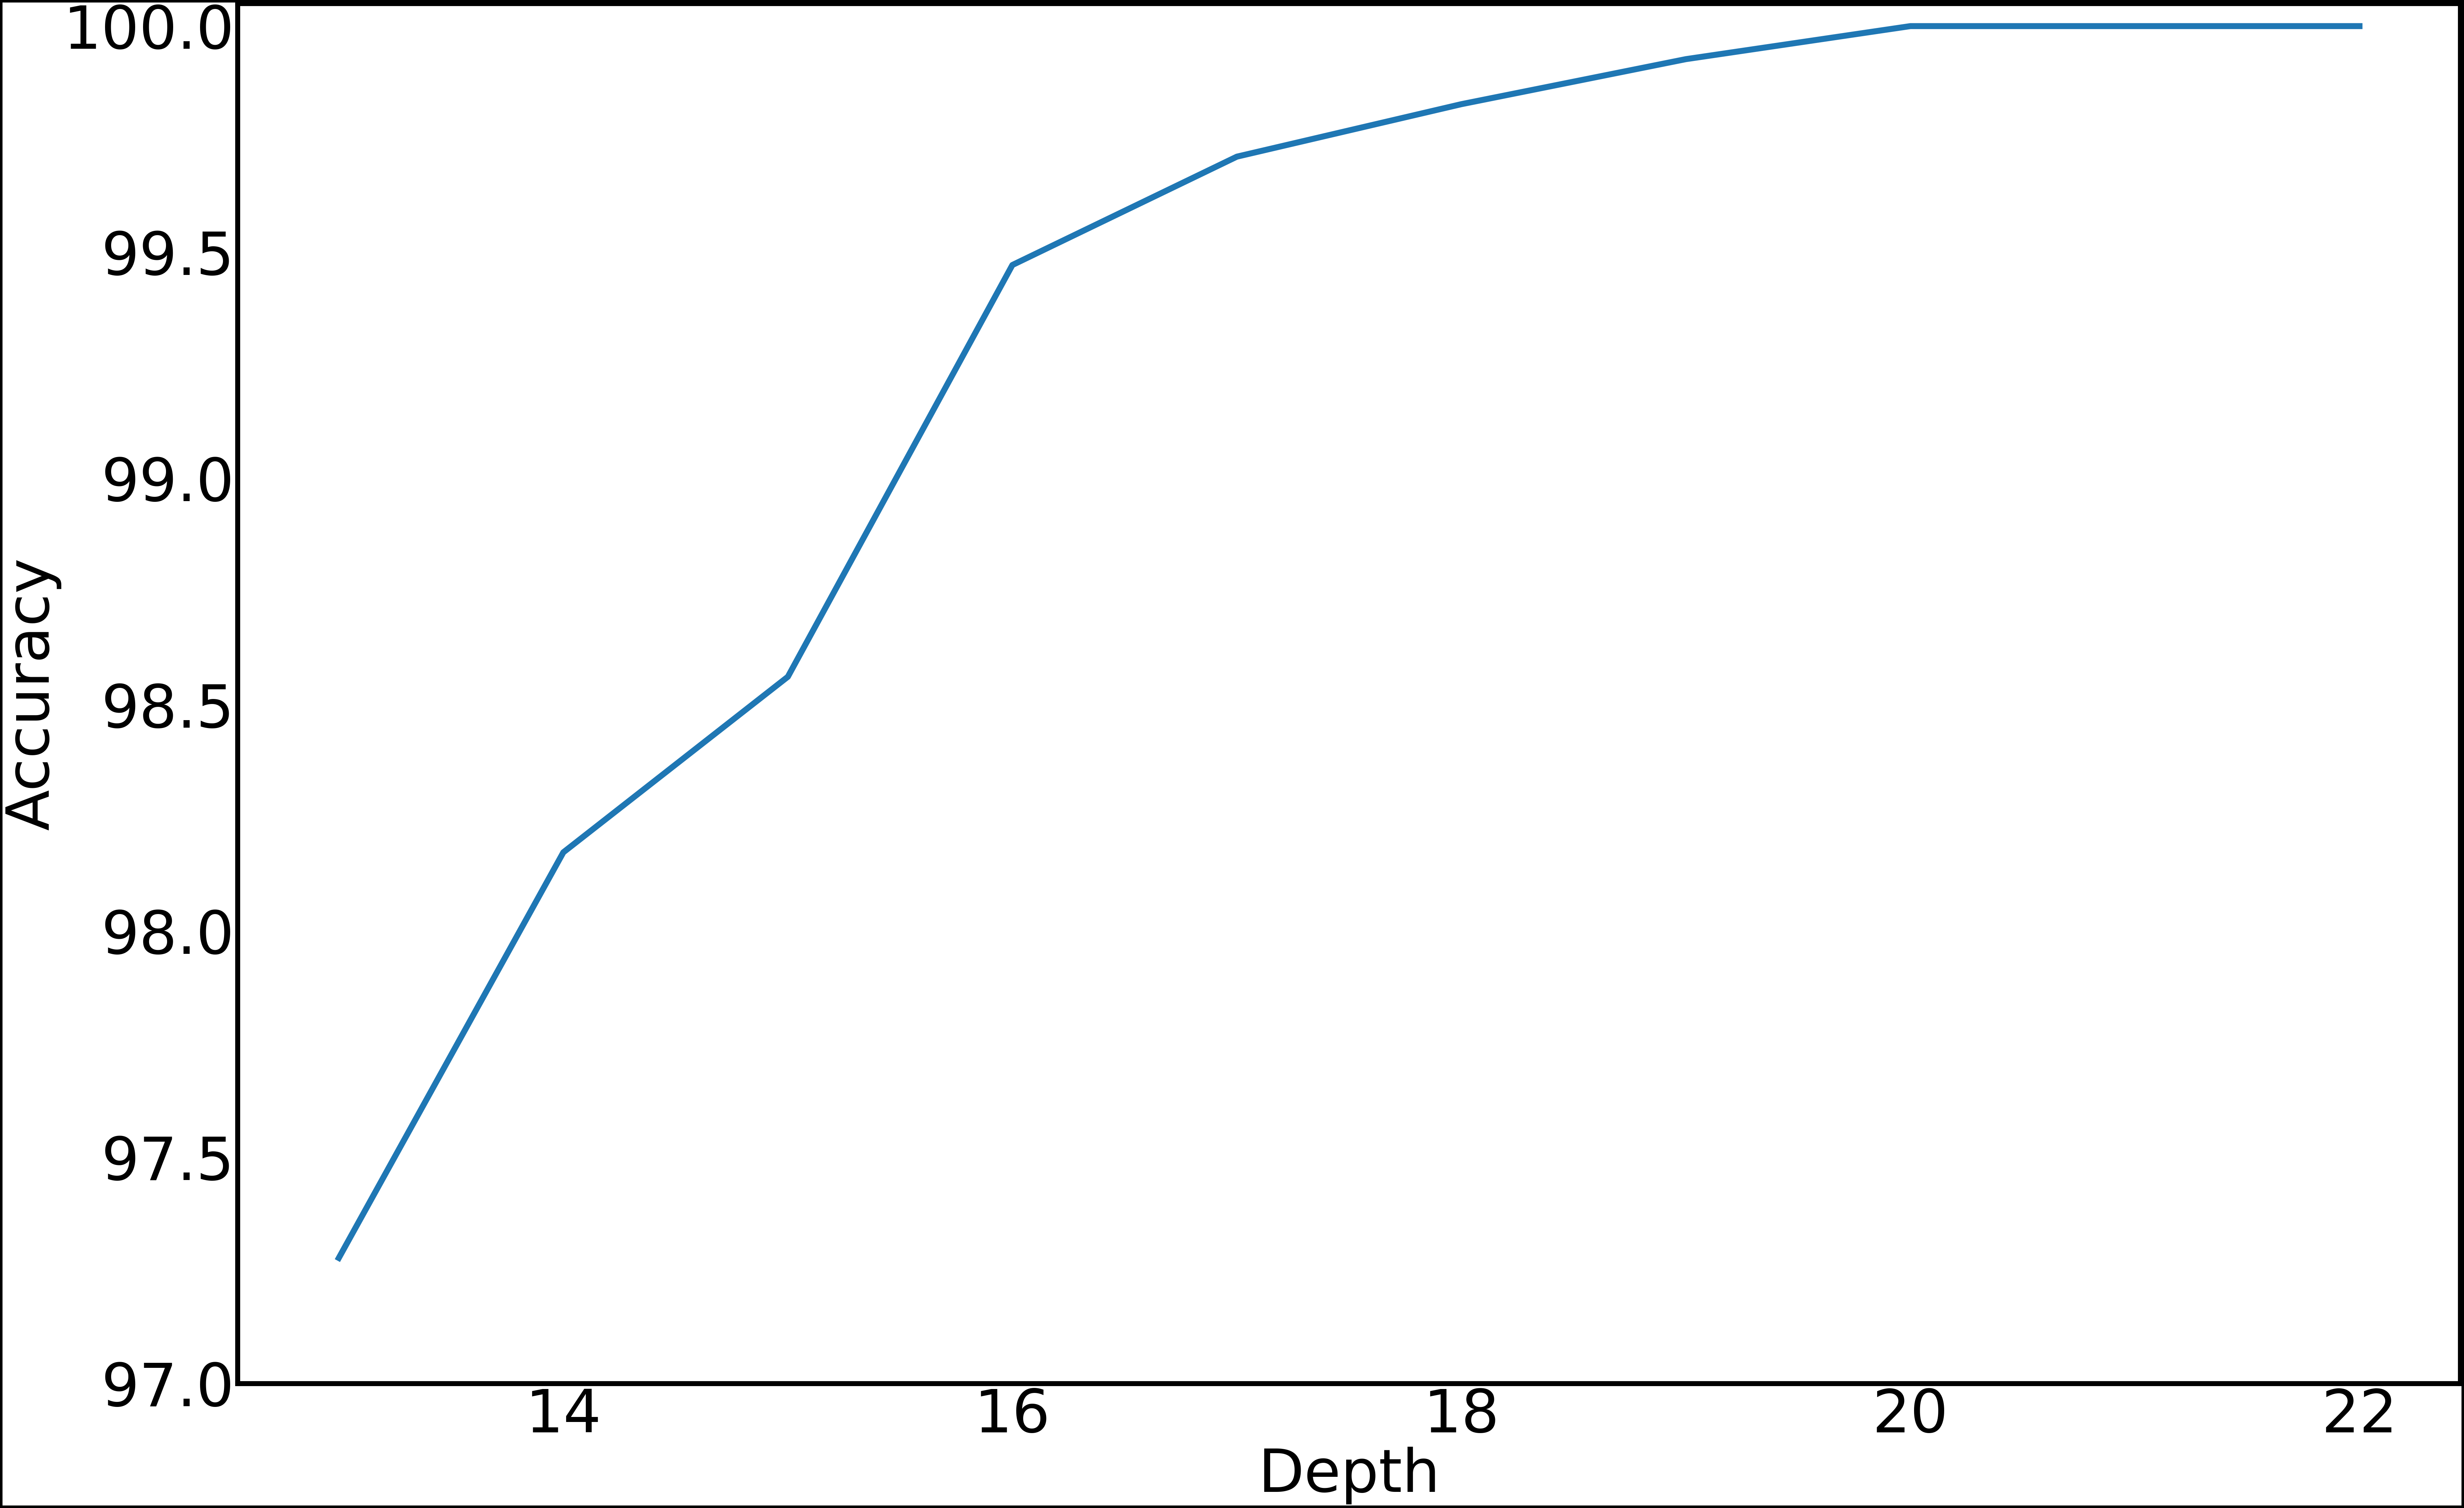

In [18]:
fig, ax = plt.subplots(figsize=(80,50))
plt.ylim(97,100.05)

ax.spines['right'].set_linewidth(10)
ax.spines['top'].set_linewidth(10)
ax.spines['left'].set_linewidth(10)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(10)
ax.spines['bottom'].set_color('black')
plt.plot(lst_depth, lst_acc, linewidth=12)

plt.xlabel('Depth', fontsize = 120)
plt.ylabel('Accuracy', fontsize = 120)


plt.xticks(fontsize=120)
plt.yticks(fontsize=120)

fig.patch.set_edgecolor('black')
fig.patch.set_linewidth('10')
plt.show

## Extracting the testing data
### Importing the dataset and seperating it into inputs and target

In [8]:
df_test = pd.read_csv("test_samples_new.csv")
df_test.head()

I/Q signal  Modulation_type  SNR  Amplitude Primary_User_Presence
0    0.099661+0.29101i               61   18   0.307602                   Yes
1    -0.44902-0.58142i               13   12   0.734621                   Yes
2      1.0156-0.32622i               44   -2   1.066707                    No
3  -0.0051797+0.10542i                0   12   0.105547                   Yes
4  -0.093558-0.060805i               21    6   0.111581                    No

In [9]:
df_test['Primary_user_presence_n'] = encoder.fit_transform(df_test['Primary_User_Presence'])

df_test.head()

I/Q signal  Modulation_type  SNR  Amplitude Primary_User_Presence  \
0    0.099661+0.29101i               61   18   0.307602                   Yes   
1    -0.44902-0.58142i               13   12   0.734621                   Yes   
2      1.0156-0.32622i               44   -2   1.066707                    No   
3  -0.0051797+0.10542i                0   12   0.105547                   Yes   
4  -0.093558-0.060805i               21    6   0.111581                    No   

   Primary_user_presence_n  
0                        1  
1                        1  
2                        0  
3                        1  
4                        0

In [10]:
inputs_test = df_test.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
inputs_test.head()

Modulation_type  SNR  Amplitude
0               61   18   0.307602
1               13   12   0.734621
2               44   -2   1.066707
3                0   12   0.105547
4               21    6   0.111581

In [11]:
target_test = df_test['Primary_user_presence_n']   #Target dataset containing presence of user
target_test.head()

0    1
1    1
2    0
3    1
4    0
Name: Primary_user_presence_n, dtype: int32

### Finding the testing accuracy of the model

In [12]:
model_DT.score(inputs_test,target_test)

0.98499

### Finding out number of misclassified samples

In [13]:
target_pred = model_DT.predict(inputs_test)

misclassified = np.where(target_test!=target_pred)
len(misclassified[0])

1501

### Plotting the obtained Decision Tree 

In [15]:
fig = plt.figure(figsize=(250,80))

a =tree.plot_tree(model_DT,fontsize=15)
plt.title("Decision Tree", fontsize=80,x=0.595, y=1.02)
plt.show()


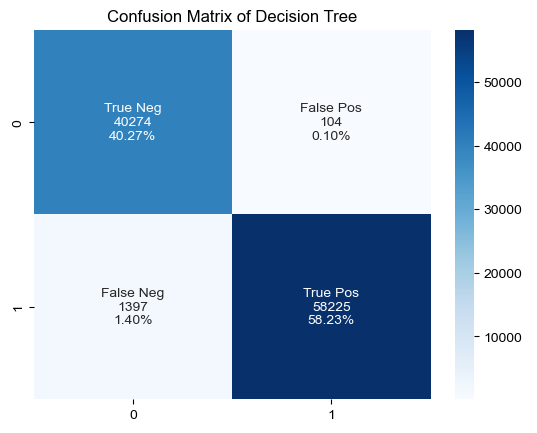

In [14]:
cf_DT = confusion_matrix(target_test, target_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_DT.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_DT.flatten()/np.sum(cf_DT)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a= sns.heatmap(cf_DT, annot=labels, fmt='', cmap='Blues')
a.set_title('Confusion Matrix of Decision Tree')
sns.set(rc={"figure.figsize":(2, 3)})
plt.show()

In [15]:
TP=cf_DT[1][1] 
TN=cf_DT[0][0]
FP=cf_DT[0][1]
FN=cf_DT[1][0]
N=TP+TN+FP+FN

### Obatining the Probability of Detection

In [16]:
PD = TP/(FN+TP)
print("The probablity of detection of the model is "+ str(PD*100) + '%')

The probablity of detection of the model is 97.65690516923283%


### Obtaining the Probablilty of False Alarm

In [17]:
PF = FP/(FP+TN)
print("The probablity of false alarm of the model is "+ str(PF*100)+'%')


The probablity of false alarm of the model is 0.25756600128783%


### Plotting the graph for Probability of Detection at different values of SNR

In [59]:
df_test.SNR.unique()

array([18, 12, -2,  6,  0, 14,  8, 16,  2, -4,  4, 10], dtype=int64)

In [18]:
# Separating the test dataset according to the values of SNR
df_sn4 = df_test[df_test['SNR'] == -4]
df_sn2 = df_test[df_test['SNR'] == -2]
df_s0 = df_test[df_test['SNR'] == 0]
df_s2 = df_test[df_test['SNR'] == 2]
df_s4 = df_test[df_test['SNR'] == 4]
df_s6 = df_test[df_test['SNR'] == 6]
df_s8 = df_test[df_test['SNR'] == 8]
df_s10 = df_test[df_test['SNR'] == 10]
df_s12 = df_test[df_test['SNR'] == 12]
df_s14 = df_test[df_test['SNR'] == 14]
df_s16 = df_test[df_test['SNR'] == 16]
df_s18 = df_test[df_test['SNR'] == 18]

In [19]:
inputs_test_sn4 = df_sn4.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_sn4 = df_sn4['Primary_user_presence_n']  

inputs_test_sn2 = df_sn2.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_sn2 = df_sn2['Primary_user_presence_n'] 

inputs_test_s0 = df_s0.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s0 = df_s0['Primary_user_presence_n'] 

inputs_test_s2 = df_s2.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s2 = df_s2['Primary_user_presence_n'] 

inputs_test_s4 = df_s4.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s4 = df_s4['Primary_user_presence_n'] 

inputs_test_s6 = df_s6.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s6 = df_s6['Primary_user_presence_n'] 

inputs_test_s8 = df_s8.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s8 = df_s8['Primary_user_presence_n'] 

inputs_test_s10 = df_s10.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s10 = df_s10['Primary_user_presence_n'] 

inputs_test_s12 = df_s12.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s12 = df_s12['Primary_user_presence_n'] 

inputs_test_s14 = df_s14.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s14 = df_s14['Primary_user_presence_n'] 

inputs_test_s16 = df_s16.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s16 = df_s16['Primary_user_presence_n'] 

inputs_test_s18 = df_s18.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s18 = df_s18['Primary_user_presence_n'] 

In [20]:
lst_ip_tests = [inputs_test_sn4, inputs_test_sn2, inputs_test_s0, inputs_test_s2, inputs_test_s4, inputs_test_s6,
                inputs_test_s8, inputs_test_s10, inputs_test_s12, inputs_test_s14, inputs_test_s16, inputs_test_s18]

In [21]:
lst_tg_tests = [target_test_sn4, target_test_sn2, target_test_s0, target_test_s2, target_test_s4, target_test_s6,
                target_test_s8, target_test_s10, target_test_s12, target_test_s14, target_test_s16, target_test_s18]

In [22]:
# Creating a list of PD values at different SNR for the plot
lst_PD_DT = []
for i in range (12):
    target_pred_new = model_DT.predict(lst_ip_tests[i])
    cf_DT = confusion_matrix(lst_tg_tests[i], target_pred_new)
    TPn=cf_DT[1][1] 
    TNn=cf_DT[0][0]
    FPn=cf_DT[0][1]
    FNn=cf_DT[1][0]
    PDn = TPn/(FNn+TPn)
    lst_PD_DT.append(PDn)

    
lst_PD_DT

[0.9354838709677419,
 0.9591474245115453,
 0.9560249307479224,
 0.9576964095271951,
 0.9531948461740731,
 0.9324586977648203,
 0.9158456486042693,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [23]:
# Creating a list of Accuracy values at different SNR for the plot
lst_Acc = []
for i in range (12):
    a = model_DT.score(lst_ip_tests[i],lst_tg_tests[i])
    lst_Acc.append(a)
lst_Acc


[0.9769507803121249,
 0.9828378051728306,
 0.9813095381647172,
 0.9833233353329334,
 0.9785438765670202,
 0.9662073097663272,
 0.9508098380323935,
 0.9998793581855471,
 1.0,
 1.0,
 0.999760851369126,
 1.0]

### Plotting the graph of Accuracy at different values of SNR

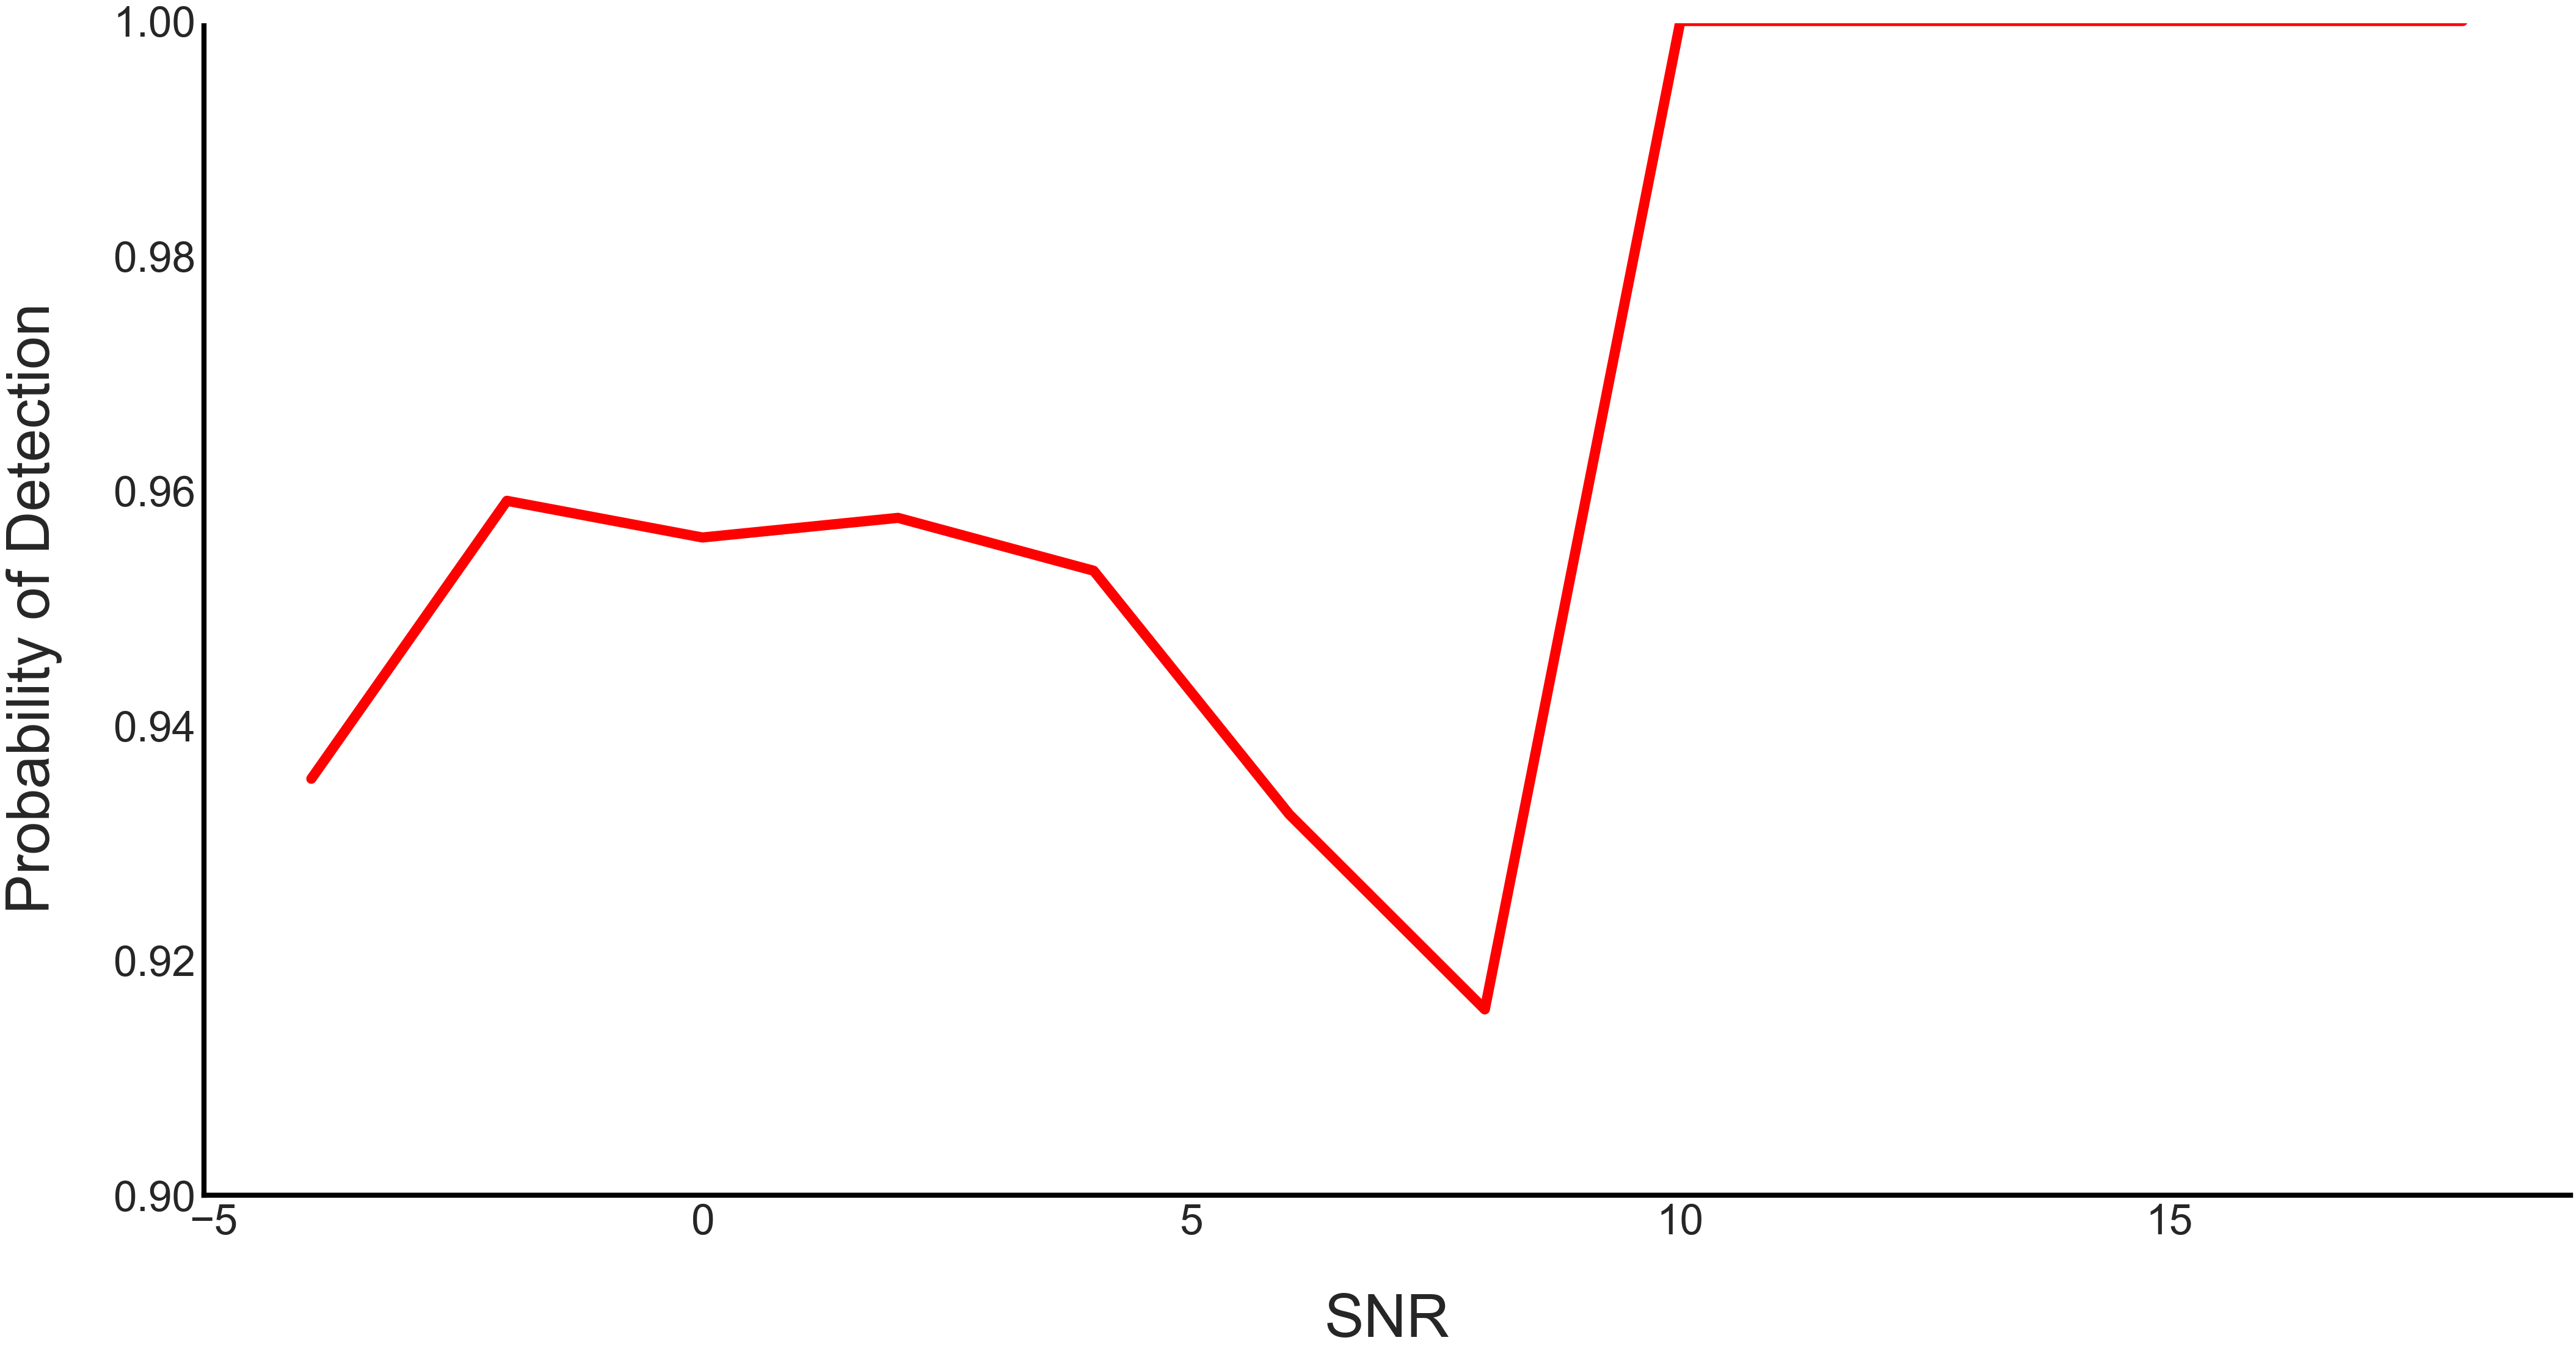

In [24]:
lst_snr = [-4,-2,0,2,4,6,8,10,12,14,16,18]
fig, ax = plt.subplots(figsize=(50, 25))
ax.plot(lst_snr, lst_PD_DT, color='red', linewidth=12)


ax.set_ylim(0.9, 1.0001)
ax.set_xlabel('SNR', fontsize=70, labelpad=60)
ax.set_ylabel('Probability of Detection', fontsize=70, labelpad=60)
ax.tick_params(labelsize=50)

ax.spines['right'].set_linewidth(8)
ax.spines['top'].set_linewidth(8)
ax.spines['left'].set_linewidth(6)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(6)
ax.spines['bottom'].set_color('black')
ax.set_facecolor("white")
plt.show()

### The evaluation paramter values are

In [25]:
lst_Pfa_DT = []
for i in range (12):
    target_pred_new = model_DT.predict(lst_ip_tests[i])
    cf_DT = confusion_matrix(lst_tg_tests[i], target_pred_new)
    TPn=cf_DT[1][1] 
    TNn=cf_DT[0][0]
    FPn=cf_DT[0][1]
    FNn=cf_DT[1][0]
    Pfan = FPn/(FPn+TNn)
    lst_Pfa_DT.append(Pfan)

    
lst_Pfa_DT

[0.0038630377524143987,
 0.004945960798681077,
 0.005180388529139685,
 0.003621876131836291,
 0.0,
 0.0009458500827618822,
 0.0,
 0.00041631973355537054,
 0.0,
 0.0,
 0.003703703703703704,
 0.0]

<table style="width:50%">
  <tr>
    <th style="font-size:15px; text-align:left">Criteria</th>
    <th style="font-size:15px; text-align:left">Obtained Values</th> 
  </tr>
  <tr>
    <td style="font-size:13px; text-align:left">Accuracy</td>
    <td style="font-size:13px; text-align:left">98.49 %</td>
  </tr>
  <tr>
    <td style="font-size:13px; text-align:left">Probability of Detection</td>
    <td style="font-size:13px; text-align:left">97.65 %</td>
  </tr>
  <tr>
    <td style="font-size:13px; text-align:left">Probability of False Alarm</td>
    <td style="font-size:13px; text-align:left">0.25%</td>
  </tr>
</table>



### And the number of misclassified samples are 1501